# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

You will have up to **two hours** to complete this assessment.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [2]:
# import the necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Find and assign to the variables in the next cell:

1. $P(A and B)$

2. $P(A or B)$

3. $P(A|B)$

4. $P(B|A^{c})$

Hint: draw a diagram!


In [31]:
ans1 = 0.4 * 0.7
ans2 = 0.7 + 0.5 - ans1
ans3 = 0.4*0.7/0.5
ans4 = (.5-.28)/(1-.7)

In [32]:
ans1, ans2, ans3, ans4

(0.27999999999999997,
 0.9199999999999999,
 0.5599999999999999,
 0.7333333333333332)

### b. Card Combinatorics

You have a standard deck of 52 cards. We define three subsets:

1. What is the probability of drawing a king or a queen?
2. How many possible 5-card combinations can be formed with this deck of 52 cards?
3. Given that you've drawn 5 cards without replacement, what is the probability of getting **2 red cards** and **3 black cards**?


In [35]:
ans1 = 8/52
ans2 = np.math.factorial(52)/(np.math.factorial(47)*np.math.factorial(5)) #ways to choose 5 cards
ans3 = (np.math.factorial(26)/(np.math.factorial(2)*np.math.factorial(24)) * np.math.factorial(26)/(np.math.factorial(3)*np.math.factorial(23)))/ans2

In [36]:
ans1,ans2,ans3

(0.15384615384615385, 2598960.0, 0.3251300520208083)

### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

1. Let $k$ be the number of points won in the game. Write a function that takes in the number of draws, the probability of winning a point and $k$ to return the corresponding probability.

In [38]:
import scipy.special as ss

In [7]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    possible = np.math.factorial(n)/(np.math.factorial(n-k)*np.math.factorial(k)) # total ways to get a face card
    return possible*(p**k)*((1-p)**(n-k))

2. Using your function, what is the probability of winning 8 points out of 22 draws?


In [8]:
ans2 = probability_of_scoring_k(22,12/52,8)
ans2

0.06532117736042573

3. Plot the probability mass function of $k$ in 22 draws.


In [40]:
points_k = list(range(23))

<BarContainer object of 23 artists>

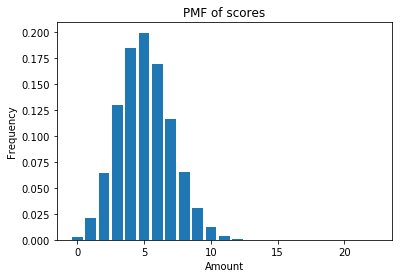

In [45]:
kpmf = list(stats.binom.pmf(p=12/52,n=22,k=points_k))
plt.title('PMF of scores')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.bar(points_k,kpmf)

4. Plot the cumulative density function of $k$ in 22 draws.

<BarContainer object of 23 artists>

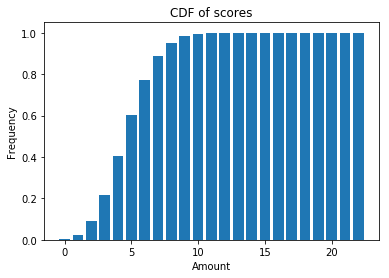

In [43]:
kcdf = list(stats.binom.cdf(p=12/52,n=22,k=points_k))
plt.title('CDF of scores')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.bar(points_k,kcdf)

## Part 2: Statistical Distributions

### a. Descriptive Statistics

1. `ratings` is a list of ratings for a TexMex restaurant. Compute the descriptive statistics of `ratings`.

In [12]:
ratings = [1, 2, 7, 7.5, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10]

mean = np.mean(ratings)
median = np.median(ratings)
mode = stats.mode(ratings)[0][0]
standard_deviation = np.std(ratings)
number_range = np.max(ratings)-np.min(ratings)
interquartile_range = stats.iqr(ratings)

print(
"Mean: ", mean, "\n" 
"Median: ", median, "\n"
"Mode: ", mode, "\n"
"Standard Deviation: ", standard_deviation, "\n"
"Range: ", number_range, "\n"
"Interquartile Range: ", interquartile_range)

Mean:  7.694444444444445 
Median:  8.0 
Mode:  8.0 
Standard Deviation:  2.351942984527715 
Range:  9.0 
Interquartile Range:  1.0


2. What measure of centrality would you use to most fairly describe the ratings and why?

In [13]:
# Your written answer here
'use mean because ratings are a single category with numerical value'

'use mean because ratings are a single category with numerical value'

### b. Continuous Distributions

Say we have data on all $10,000$ checks for this TexMex restaurant and they happen to be normally distributed with $\mu = 20$ and $\sigma = 2$. We can visualize the data as follows: 

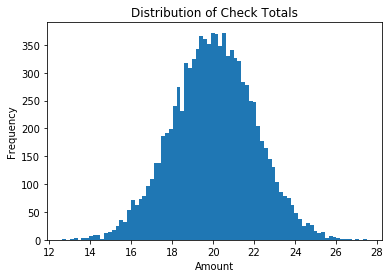

In [14]:
data = pickle.load(open("data/data10000.pkl", "rb"))
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data, bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

1. Write a function to compute z-scores of single checks.


In [15]:
len(data)

10000

In [48]:
def z_score(check_amt):
    
    """
    check_amt = the amount for which we want to compute the z-score
    
    """
    return (check_amt-20) / 2

2. Using $\alpha = 0.05$, is my 23 dollar check significantly **greater** than the mean? Assign boolean `True` for yes, `False` for no to `ans2`.
3. What if my check comes up to 24 dollars?

In [49]:
z_score(23), z_score(24)

(1.5, 2.0)

In [18]:
stats.norm.sf(z_score(23))

0.06680720126885807

In [19]:
ans2 = False
ans3 = True

4. Define **confidence interval** and determine the 95% confidence interval for this population.

In [50]:
np.mean(data)-1.96*(2), np.mean(data)+1.96*(2)

(16.108166189018355, 23.94816618901836)

In [21]:
# Your written answer here
'confidence interval provides the two values that the variable in question will fall between, with a given percentage of confidence'

'confidence interval provides the two values that the variable in question will fall between, with a given percentage of confidence'

5. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [22]:
# Your written answer here
'Central Limit Theorem states that, regardless of population distribution, the distribution of its sample means will be normally distributed'
'With a sample size large enough each time a sample mean is calculated, one can infer that the pop mean is equal to the mean of sample means'

'With a sample size large enough each time a sample mean is calculated, one can infer that the pop mean is equal to the mean of sample means'

## Part 3: Statistical Testing

### a. Hypotheses and Errors

This TexMex restaurant recently introduced Queso to its menu. The restaurant owners want to know if customers ordering Queso end up spending **more or less**. Let the average amount on Queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ $X_{Q}$ $=$ $X_{N}$ (no queso)

$H_{A}:$ $X_{Q}$ $\not =$ $X_{N}$

2. In this context, what does it mean to make `Type I` and `Type II` errors?

In [23]:
# Your written answer here
"Type I error: rejecting when null is true - saying that queso customers do not spend the same as non-queso customers when it's wrong"
"Type II error: fail to reject when null is false - saying that queso customers spend the same as non-queso customers when it's wrong"

"Type II error: fail to reject when null is false - saying that queso customers spend the same as non-queso customers when it's wrong"

### b. Sample Testing

Now assume we don't have reliable data on the population. With $\alpha = 0.05$, we want to determine if Queso checks are significantly more **or** less than normal. We have random samples of Queso and Non-Queso checks. The samples are in the graphs below and you may assume they have equal variances.

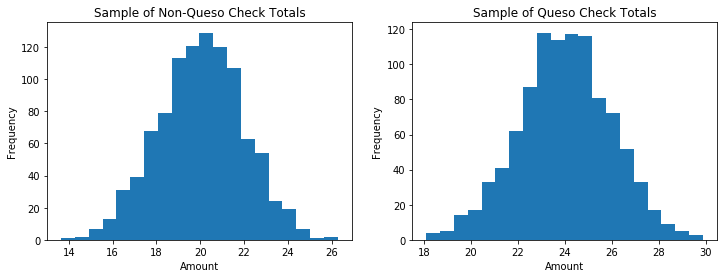

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

1. Run a `statistical test` on the two samples to determine whether you should reject your null hypothesis.

In [25]:
len(queso), len(no_queso)

(1000, 1000)

In [26]:
stats.ttest_ind(queso,no_queso)

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [27]:
'reject null hypothesis'

'reject null hypothesis'

2. What are the conditions required to perform the test you chose?

In [28]:
# Your written answer here
'used a t-test'
'the two samples are independent, population data is assumed unknown, sample size is >=30'

'the two samples are independent, population data is assumed unknown, sample size is >=30'

## Part 4: Bayesian Statistics
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

1. What is the probability of Thomas getting a small puppy?
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store?
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4. For Part 2, what is the prior, posterior and likelihood?

In [29]:
ans1 = 0.12+.08
ans2 = .02/.46
ans3 = "store"
ans4_prior = "probability of store" #?
ans4_posterior = "probability of store given large puppy" #?????
ans4_likelihood = "probability of large puppy given store" #??

In [30]:
ans1, ans2, ans3

(0.2, 0.043478260869565216, 'store')